<a href="https://colab.research.google.com/github/sterlinggutterman/linearRegression/blob/main/SG_linear_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
  - A linear model takes one variable and uses it to predict another. If there is a direct correlation, the relationship is said to be linear.
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
  - One-hot-encoded variables are categorical variables that have been converted to numeric values for the sake of the model. In some models, one category of the new variable becomes the intercept, so the coefficient is interpreted in relation to that.
3. Can linear regression be used for classification? Explain why, or why not.
  - Classification is when a model predicts a categorical outcome, so liner regression could be used if the categorical variables are converted into dummy variables. The outcome is less reliable as there is often more variation in categorical variables and the conversion is not perfect.
4. What are signs that your linear model is over-fitting?
  - Over-fitting occurs when a model is too complex for the data it is explaining. A negative r^2 indicates severe over-fitting.
5. Clearly explain multi-colinearity using the two-stage least squares technique.
  - Multicolinearity occurs when more than one variable is correlated with another. When these varaibles are regressed on each other, they cancel out and can not accurately predict the correlation between them. The two-stage least squares tecnique is a way to determine what is the most likely correlation between the multiple-correlated variables. The method utilizes an instrumental variable that is can provide a different correlation to avoid the variable that is causing the multicolinierity.
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
  - Non-linear relationships are bound to appear in some way. Neural networks are non-linear representations of linear relationships. Trees also represent non-linear relationships by showing all possible outcomes of how data are related.
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
  - The intercept represents the predicted value of Y when X is 0. The slope coefficient is how Y changes in relation to X. For a dummy variable, the coefficient represents the reference category of the variable.


Sources
- https://datatab.net/tutorial/linear-regression
- https://julius.ai/articles/two-stage-least-squares-2sls-regression-analysis
- https://www.deepchecks.com/glossary/one-hot-encoding/

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [1]:
! git clone https://github.com/sterlinggutterman/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 42 (delta 8), reused 4 (delta 4), pack-reused 27 (from 1)
Receiving objects: 100% (42/42), 2.49 MiB | 11.14 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Understanding the data

In [3]:
# load the data
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [6]:
# average price by neighbourhood
group = 'Neighbourhood '
var = 'Price'
df.loc[:,[group, var]].groupby(group).mean()

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


Manhattan is the most expensive on average at 183.66, followed by Staten Island at $146.17.

In [5]:
# average scroe by Neighbourhood
group = 'Neighbourhood '
var = 'Review Scores Rating'
df.loc[:,[group, var]].groupby(group).mean()

,Review Scores Rating
Neighbourhood,
Bronx,91.654378
Brooklyn,92.363497
Manhattan,91.801496
Queens,91.549057
Staten Island,90.843750


Brooklyn has the highest average review scores rating at 92.36, followed by Manhattan at 91.80.

<Axes: xlabel='Price', ylabel='Density'>

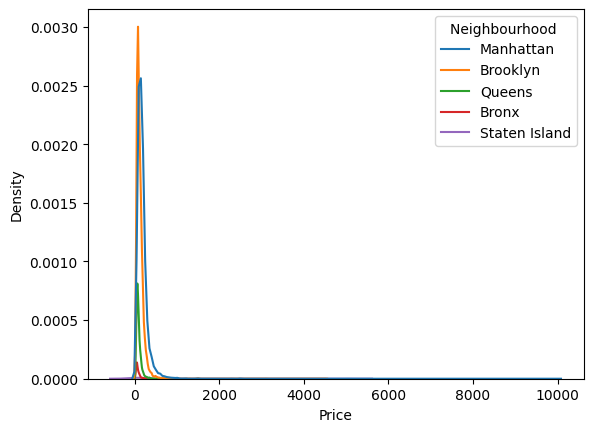

In [7]:
# kernal density plot of price by Neighbourhood
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ')

<Axes: xlabel='price_log', ylabel='Density'>

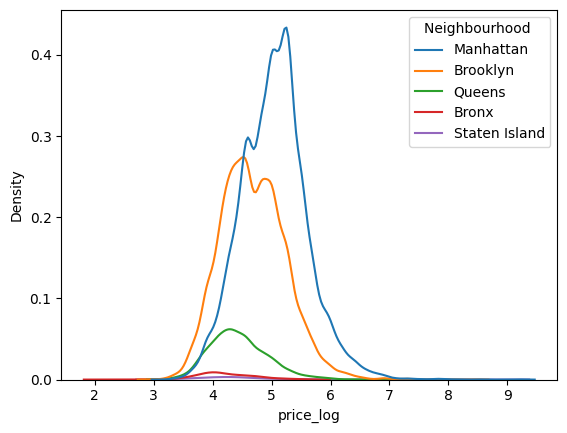

In [8]:
# kernal density plot of log price by Neighbourhood
df['price_log'] = np.log(df['Price'])
sns.kdeplot(data=df, x='price_log', hue='Neighbourhood ')

  2. Regressing Price on Neighbourhood

In [9]:
# Coverting neighbourhood to one-hot
pd.get_dummies(df['Neighbourhood '])

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,False,False,True,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
22148,False,False,True,False,False
22149,False,True,False,False,False
22150,False,True,False,False,False
22151,False,True,False,False,False


In [10]:
# variables
x_d = pd.get_dummies(df['Neighbourhood '], dtype='int')
y = df['Price']

# regression
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression(fit_intercept=False).fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


Observations
- For each neighbourhood, the regression coefficient is the same as the average price.
- This finding shows that for one continuous categorical variable the regression coefficient will be the average of the dependent variable.

3. Regression with intercept

In [11]:
# variables
x_d = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)
y = df['Price']

# regression
reg_model = LinearRegression().fit(x_d, y)

# coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
print('R-squared: ', reg_model.score(x_d, y))
result

R-squared:  0.04631389606035197


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [12]:
print(reg_model.intercept_)

75.27649769585331


Observations
- The Bronx was chosen as the intercept because it comes first alphabetically. The coefficient is maintained from the previous regression.
- For each neighbourhood, the coefficient is much smaller because it is being compared to the Bronx.
- The order of coefficient size remains the same, with Manhattan being the largest and Queens being the smallest.

4. MLR: price vs. review score rating and neighbourhood

In [13]:
# splitting data 80/20
from sklearn.model_selection import train_test_split
x = df.loc[:,['Review Scores Rating','Neighbourhood ']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [14]:
# combining variables for MLR
r_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighbourhood '], dtype='int')], axis=1)
r_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighbourhood '], dtype='int')], axis=1)

In [15]:
# regression
from sklearn import linear_model
reg_model = LinearRegression(fit_intercept=False).fit(r_train, y_train)

# measure of model
y_hat = reg_model.predict(r_test)
print('R-squared: ', reg_model.score(r_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# display coefficients
result = pd.DataFrame({'variable':reg_model.feature_names_in_, 'coefficient': reg_model.coef_})
result

R-squared:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [16]:
# price per night in Manhattan
100*1.032257 + 89.4

192.6257

Oberservations
- The coefficient on review scores rating represents how much a particular neighbourhood influences the rating.
- The most expensive neighbourhood is Manhattan.

5. MLR: price vs. review score rating, neighbourhood, and property type

In [17]:
# splitting data 80/20
x = df.loc[:,['Review Scores Rating','Neighbourhood ', 'Property Type']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [18]:
# combining variables for MLR
r_train = pd.concat([x_train['Review Scores Rating'], pd.get_dummies(x_train['Neighbourhood ']), pd.get_dummies(x_train['Property Type'], dtype='int')], axis=1)
r_test = pd.concat([x_test['Review Scores Rating'], pd.get_dummies(x_test['Neighbourhood ']), pd.get_dummies(x_test['Property Type'], dtype='int')], axis=1)
r_test = r_test.reindex(columns=r_train.columns, fill_value=0)
x.head()

,Review Scores Rating,Neighbourhood,Property Type
0,96.0,Manhattan,Apartment
1,100.0,Brooklyn,Apartment
2,100.0,Manhattan,Apartment
3,94.0,Brooklyn,Apartment
4,90.0,Manhattan,Apartment


In [20]:
# regression
from sklearn import linear_model
reg = LinearRegression(fit_intercept=False).fit(r_train, y_train)

# measure of model
y_hat = reg.predict(r_test)
print('R-squared: ', reg.score(r_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

# coefficients
result = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
result

R-squared:  0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-27.672764
2,Brooklyn,29.242598
3,Manhattan,91.749874
4,Queens,-0.373421
5,Staten Island,44.825719
6,Apartment,-2.497177
7,Bed & Breakfast,-33.828909
8,Boat,64.452800
9,Bungalow,51.260095


In [23]:
# price per night of a condominium in manhattan
1.01583*91.749874+92.345440+100

285.54771450542

Observations
- The regression coefficient represents how dependent price is on user rating, neighbourhood, and property type.
- Price is very dependent on condominioms, with a coefficient of 92.35.
- Price is least dependent on lighthouses, with a coefficient of -91.83.

Note: got an error that feature names in the property type category were not aligned so I did some research and found the reindex function to allign my columns
- https://www.geeksforgeeks.org/reindexing-in-pandas-dataframe/

6. The coefficient on review scores rating changes with the addition of property type because different property types have different benefits and consequences which will influence consumer opinions. The r-squared increases from 0.067 to 0.075 meaning that the model with property type better explains the variation in the model. Thus, it indicates that room-type has more of an impact on price than neighbourhood. This assesment makes sense because while neighbourhoods can generally be considered 'nice' or 'average,' there is still variation within them.
- Source: https://statisticsbyjim.com/regression/interpret-r-squared-regression/